In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, silhouette_score

In [2]:
df = pd.read_csv('E:\\Kaggle\\edanych_projekt\\train.csv')

In [3]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [5]:
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [6]:
df.shape

(209673, 8)

# Wizualizacja danych

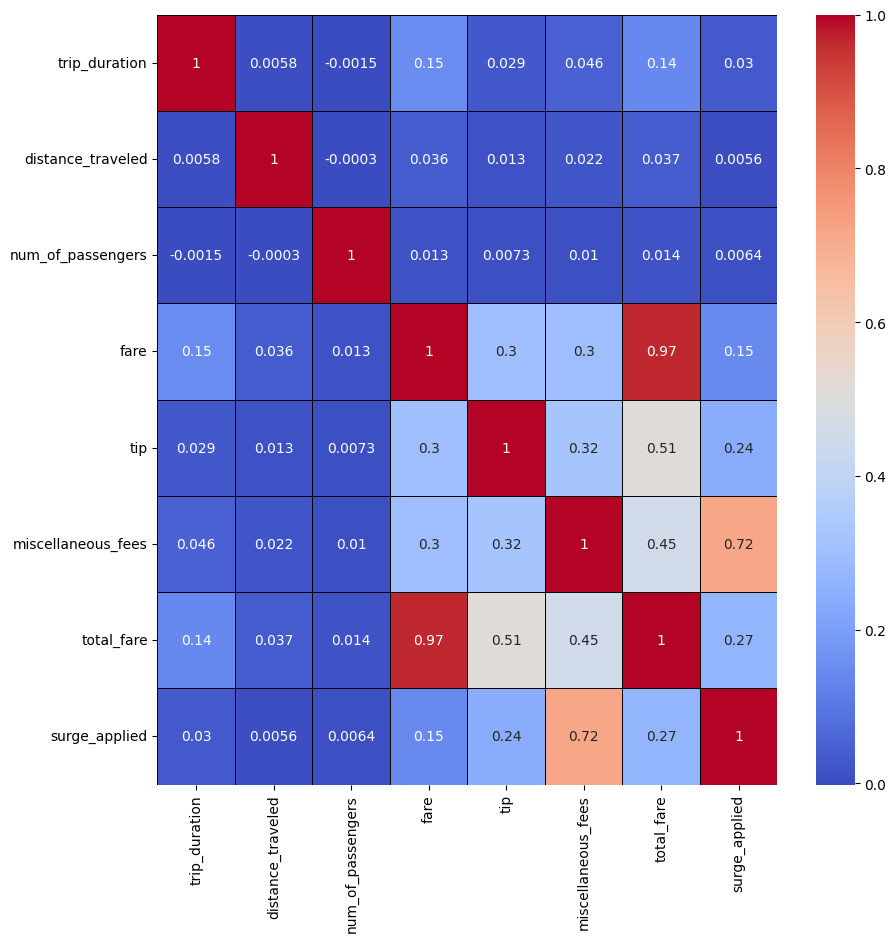

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', linecolor='black', linewidths=0.5, annot=True)
plt.show()

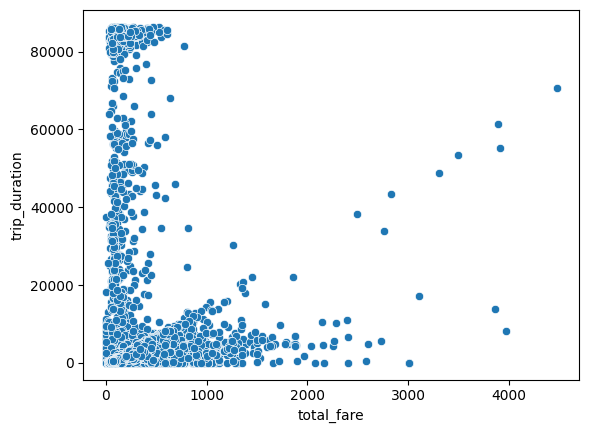

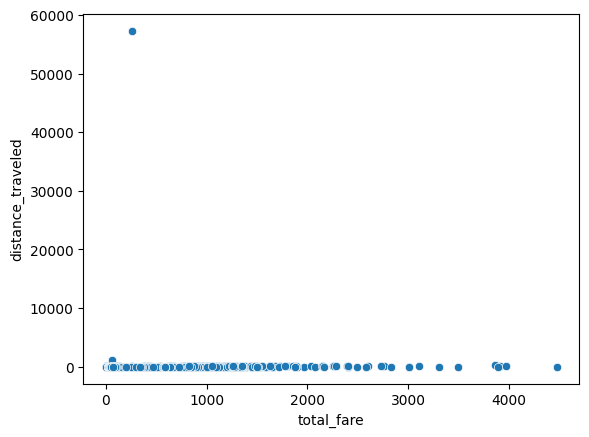

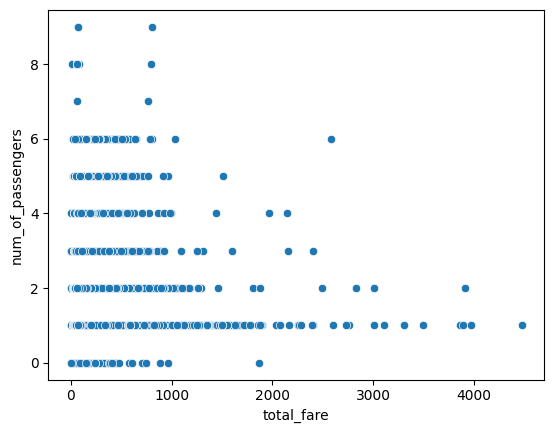

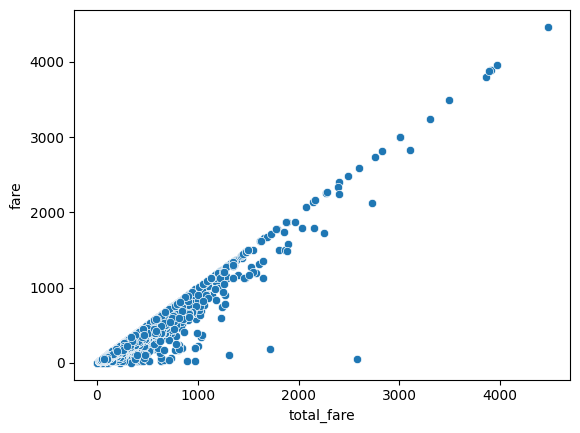

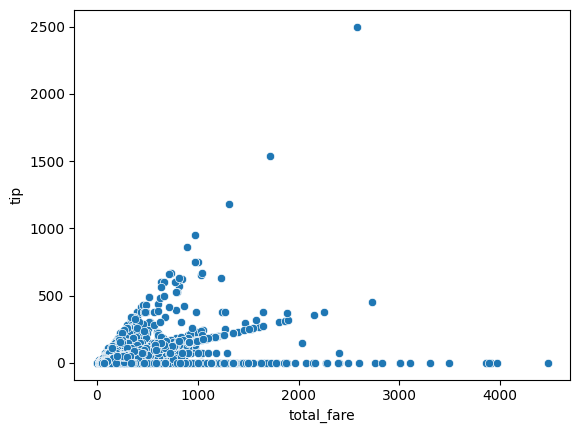

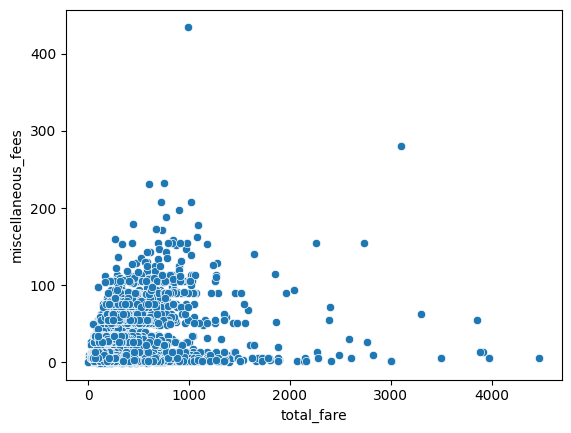

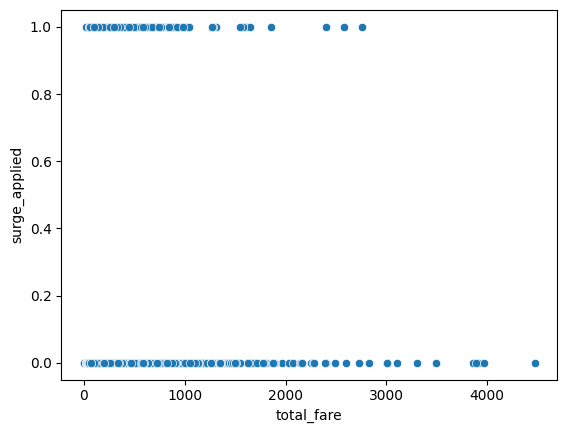

In [8]:
for col in df.columns:
    if col != 'total_fare':
        sns.scatterplot(x=df['total_fare'], y=df[col])
        plt.show()

# Przygotowanie danych

In [9]:
X = df.drop(columns=['total_fare']).copy()
X

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,0
2,730.0,3.12,1.0,71.25,0,26.625,1
3,671.0,5.63,3.0,90.00,0,9.750,0
4,329.0,2.09,1.0,45.00,12,13.200,0
...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,1
209670,571.0,2.82,1.0,63.75,0,6.000,0
209671,491.0,2.16,1.0,56.25,0,13.500,0


In [10]:
y = df['total_fare'].copy()
y

0         105.300
1         142.200
2          97.875
3          99.750
4          70.200
           ...   
209668    202.800
209669     95.325
209670     69.750
209671     69.750
209672    339.750
Name: total_fare, Length: 209673, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalowanie

In [12]:
STD = StandardScaler()

In [13]:
X_train_SD = STD.fit_transform(X_train)
X_test_SD = STD.transform(X_test)

# Regresja

In [14]:
def adjusted_r2(r2, n, p):
    """
    Calculate the Adjusted R².
    
    Parameters:
    - r2: R² (coefficient of determination)
    - n: Number of observations
    - p: Number of predictors (independent variables)
    
    Returns:
    - Adjusted R²
    """
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

Regresja liniowa

Coefficients: [-1.13360348e-14  0.00000000e+00  1.33226763e-15  8.53625881e+01
  2.05049287e+01  1.25501560e+01  3.37507799e-14]
Intercept: 127.66385866649178
R2:  1.0
Adjusted R2:  1.0
mse:  7.261319859135625e-27
mae:  7.112838198880436e-14


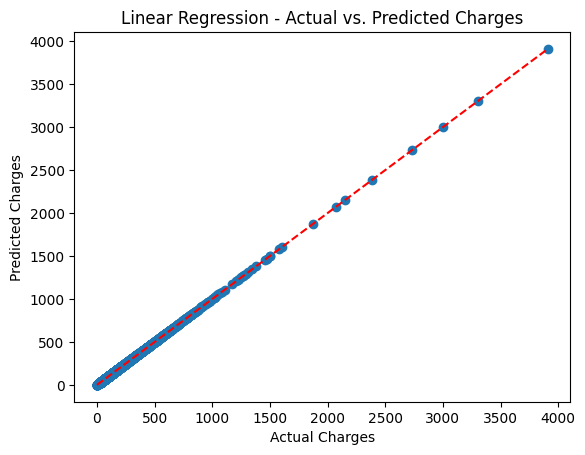

In [15]:
LR = LinearRegression()
LR.fit(X_train_SD, y_train)
y_hat = LR.predict(X_test_SD)
r2L = r2_score(y_test, y_hat)
ir2L = adjusted_r2(r2L,len(y_test),len(LR.coef_))
print("Coefficients:", LR.coef_)
print("Intercept:", LR.intercept_)
print("R2: ", r2L)
print("Adjusted R2: ", ir2L)
print("mse: ", mean_squared_error(y_hat, y_test))
print("mae: ", mean_absolute_error(y_hat, y_test))
plt.scatter(y_test, y_hat)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression - Actual vs. Predicted Charges')
plt.show()


Regresja Lasso

Coefficients: [ 0.          0.          0.         84.72744083 19.8866404  11.93487273
  0.        ]
Intercept: 127.66385866649178
R2:  0.9998103820691681
Adjusted R2:  0.999810350411155
mse:  1.9006796188112662
mae:  0.953307030854466


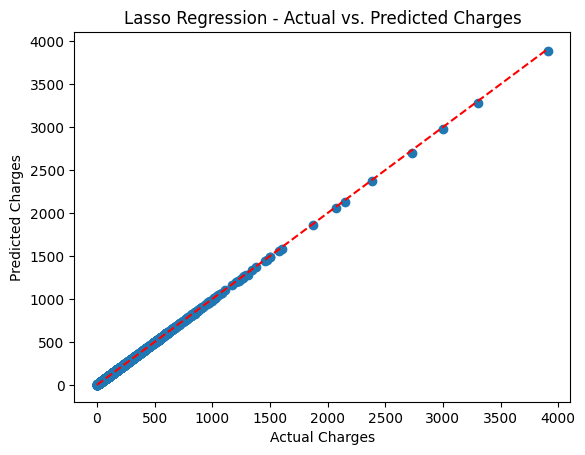

In [16]:
LA = Lasso()
LA.fit(X_train_SD, y_train)
y_hatL = LA.predict(X_test_SD)
r2A = r2_score(y_test, y_hatL)
ir2A = adjusted_r2(r2A,len(y_test),len(LA.coef_))
print("Coefficients:", LA.coef_)
print("Intercept:", LA.intercept_)
print("R2: ", r2A)
print("Adjusted R2: ", ir2A)
print("mse: ", mean_squared_error(y_hatL, y_test))
print("mae: ", mean_absolute_error(y_hatL, y_test))
plt.scatter(y_test, y_hatL)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Lasso Regression - Actual vs. Predicted Charges')
plt.show()

Regresja Ridge

Coefficients: [7.82771293e-05 1.60096738e-05 6.92681724e-06 8.53620423e+01
 2.05049389e+01 1.25502101e+01 3.61712996e-05]
Intercept: 127.66385866649178
R2:  0.9999999999721473
Adjusted R2:  0.9999999999721426
mse:  2.791887063375556e-07
mae:  0.0002994737661252728


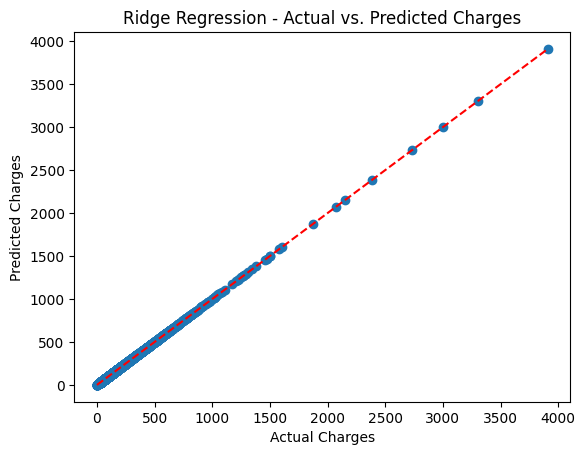

In [17]:
RG = Ridge()
RG.fit(X_train_SD, y_train)
y_hatR = RG.predict(X_test_SD)
r2R = r2_score(y_test, y_hatR)
ir2R = adjusted_r2(r2R,len(y_test),len(RG.coef_))
print("Coefficients:", RG.coef_)
print("Intercept:", RG.intercept_)
print("R2: ", r2R)
print("Adjusted R2: ", ir2R)
print("mse: ", mean_squared_error(y_hatR, y_test))
print("mae: ", mean_absolute_error(y_hatR, y_test))
plt.scatter(y_test, y_hatR)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Ridge Regression - Actual vs. Predicted Charges')
plt.show()

Regresja ElasticNet

Coefficients: [5.02554604e-02 0.00000000e+00 0.00000000e+00 8.44122270e+01
 2.04669004e+01 1.26160333e+01 9.24062757e-03]
Intercept: 127.66385866649178
R2:  0.9999098639662033
Adjusted R2:  0.9999098489173747
mse:  0.9034995878623411
mae:  0.5527897965458308


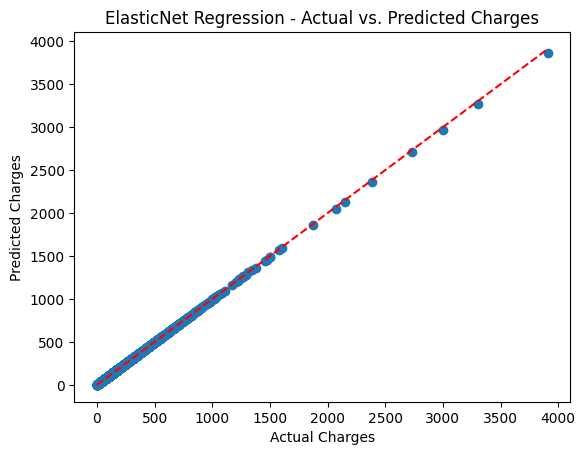

In [18]:
EN = ElasticNet(alpha=0.1,l1_ratio=0.9)
EN.fit(X_train_SD, y_train)
y_hatE = EN.predict(X_test_SD)
r2E = r2_score(y_test, y_hatE)
ir2E = adjusted_r2(r2E,len(y_test),len(EN.coef_))
print("Coefficients:", EN.coef_)
print("Intercept:", EN.intercept_)
print("R2: ", r2E)
print("Adjusted R2: ", ir2E)
print("mse: ", mean_squared_error(y_hatE, y_test))
print("mae: ", mean_absolute_error(y_hatE, y_test))
plt.scatter(y_test, y_hatE)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('ElasticNet Regression - Actual vs. Predicted Charges')
plt.show()

# Analiza skupień

In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.1, random_state=42)

In [20]:
def create_classes_based_on_fare(data, column='fare', n_classes=3):
    data['fare_class'] = pd.qcut(data[column], q=n_classes, labels=False)
    return data

In [21]:
data = create_classes_based_on_fare(X_test1, column='fare', n_classes=3)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['fare_class']))
results = {}

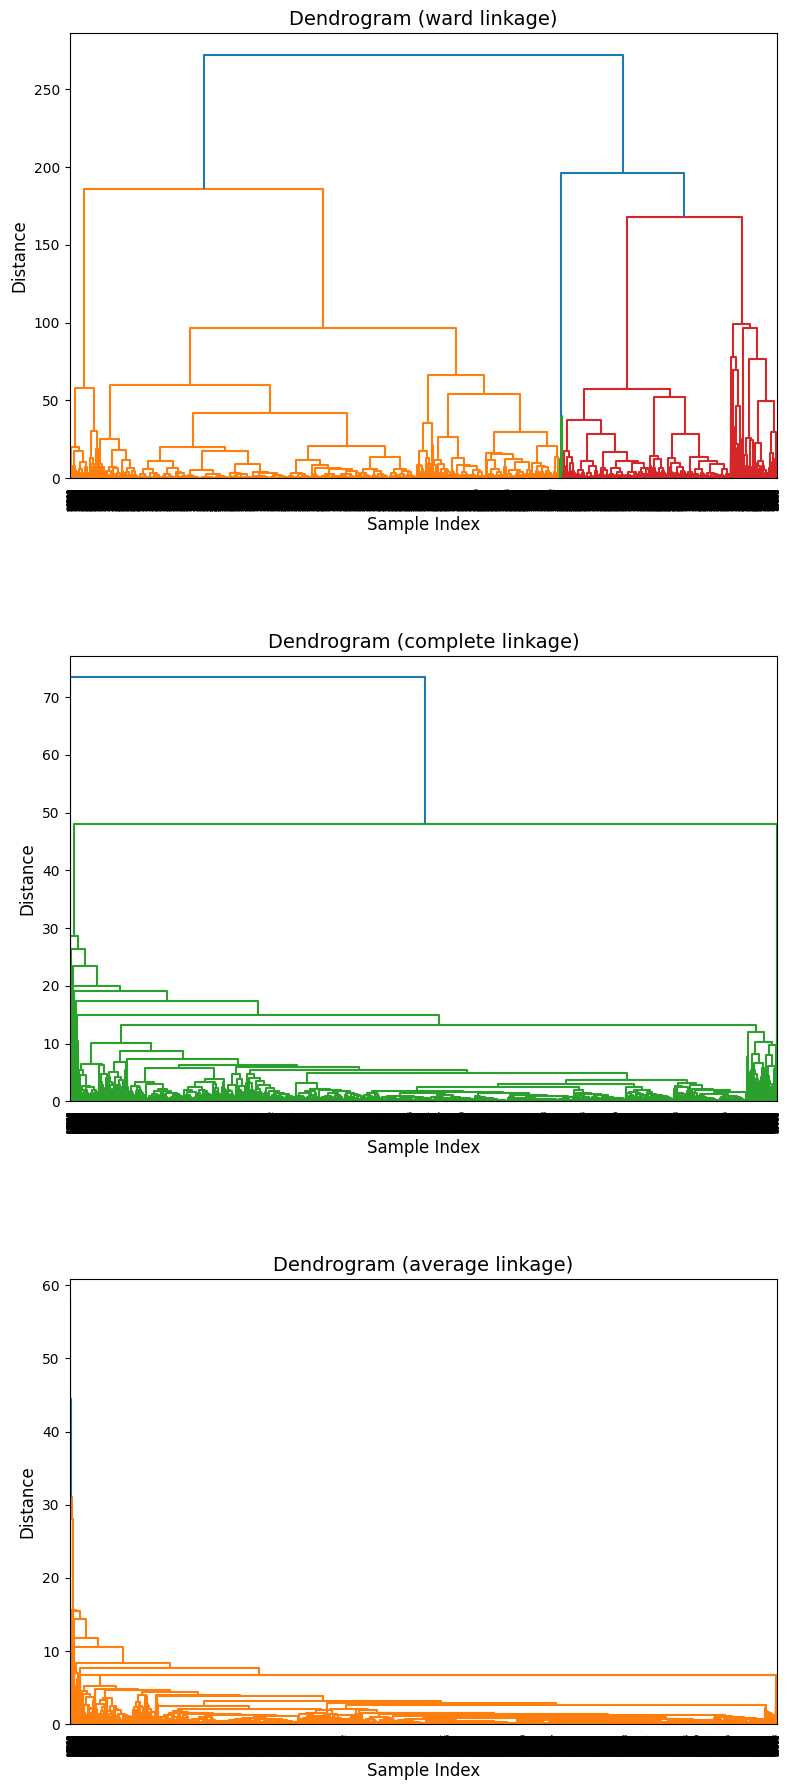

In [22]:
linkage_methods = ['ward', 'complete', 'average']
fig, axes = plt.subplots(3, 1, figsize=(8, 18))

for i, method in enumerate(linkage_methods):
    linkage_matrix = linkage(data_scaled, method=method)

    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)  # Zakładamy 3 klastry
    cluster_labels = clustering.fit_predict(data_scaled)

    
    dendrogram(linkage_matrix, ax=axes[i])
    axes[i].set_title(f'Dendrogram ({method} linkage)', fontsize=14)
    axes[i].set_xlabel("Sample Index", fontsize=12)
    axes[i].set_ylabel("Distance", fontsize=12)

    # Obliczanie jakości
    silhouette = silhouette_score(data_scaled, cluster_labels)
    results[f'Hierarchical ({method})'] = {'Silhouette': silhouette}
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [23]:
### 2. K-średnich ###
kmeans = KMeans(n_clusters=3, random_state=42)  # Zakładamy 3 klastry
kmeans_labels = kmeans.fit_predict(data_scaled)

silhouette = silhouette_score(data_scaled, kmeans_labels)
results['KMeans'] = {'Silhouette': silhouette}

In [24]:
### 3. Expectation-Maximization (Gaussian Mixture) ###
gmm = GaussianMixture(n_components=3, random_state=42)  # Zakładamy 3 komponenty
gmm_labels = gmm.fit_predict(data_scaled)

silhouette = silhouette_score(data_scaled, gmm_labels)
results['Gaussian Mixture'] = {'Silhouette': silhouette}

In [25]:
### 4. DBSCAN ###
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Usuwanie wartości outlier (-1) dla metryki silhouette
valid_labels = dbscan_labels[dbscan_labels != -1]
valid_data = data_scaled[dbscan_labels != -1]
if len(valid_labels) > 0:
    silhouette = silhouette_score(valid_data, valid_labels)
else:
    silhouette = -1
results['DBSCAN'] = {'Silhouette': silhouette}

In [26]:
### 5. Spectral Clustering ###
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(data_scaled)

silhouette = silhouette_score(data_scaled, spectral_labels)
results['Spectral Clustering'] = {'Silhouette': silhouette}

In [27]:
### Porównanie wyników ###
results_df = pd.DataFrame(results).T
print(results_df)

                         Silhouette
Hierarchical (ward)        0.488032
Hierarchical (complete)    0.917112
Hierarchical (average)     0.935514
KMeans                     0.502542
Gaussian Mixture           0.478235
DBSCAN                     0.133533
Spectral Clustering       -0.077819


Klasyfikacja

In [28]:
classifiers = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    '1NN': KNeighborsClassifier(n_neighbors=1),
    'kNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Random Tree': DecisionTreeClassifier(random_state=42),
    'Multilayer Perceptron': MLPClassifier(random_state=42)
}

# Funkcja do obliczania miar klasyfikacji
def evaluate_model(y_true, y_pred, y_prob):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f_measure = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    auc = roc_auc_score(y_true, y_prob[:, 1]) if y_prob is not None and len(np.unique(y_true)) == 2 else None
    return {
        'Confusion Matrix': cm,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F-Measure': f_measure,
        'AUC': auc
    }

In [29]:
def run_evaluation(X, y, classifiers, method, **kwargs):
    results = {}
    for name, clf in classifiers.items():
        if method == 'resubstitution':
            clf.fit(X, y)
            y_pred = clf.predict(X)
            y_prob = clf.predict_proba(X) if hasattr(clf, 'predict_proba') else None
            results[f'{name} (Resubstitution)'] = evaluate_model(y, y_pred, y_prob)
        elif method == 'train_test_split':
            X_train, X_test, y_train, y_test = train_test_split(X, y, **kwargs)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            y_prob = clf.predict_proba(X_test) if hasattr(clf, 'predict_proba') else None
            results[f'{name} (Train/Test Split)'] = evaluate_model(y_test, y_pred, y_prob)
        elif method == 'kfold':
            kf = KFold(**kwargs)
            y_pred, y_true, y_prob = [], [], []
            for train_index, test_index in kf.split(X):
                clf.fit(X[train_index], y.iloc[train_index])
                y_pred.extend(clf.predict(X[test_index]))
                y_true.extend(y.iloc[test_index])
                if hasattr(clf, 'predict_proba'):
                    y_prob.extend(clf.predict_proba(X[test_index]))
            y_prob = np.array(y_prob) if y_prob else None
            results[f'{name} (KFold CV)'] = evaluate_model(np.array(y_true), np.array(y_pred), y_prob)
        elif method == 'loo':
            loo = LeaveOneOut()
            y_pred, y_true, y_prob = [], [], []
            for train_index, test_index in loo.split(X):
                clf.fit(X[train_index], y.iloc[train_index])
                y_pred.append(clf.predict(X[test_index])[0])
                y_true.append(y.iloc[test_index])
                if hasattr(clf, 'predict_proba'):
                    y_prob.append(clf.predict_proba(X[test_index])[0])
            y_prob = np.array(y_prob) if y_prob else None
            results[f'{name} (LOO)'] = evaluate_model(np.array(y_true), np.array(y_pred), y_prob)
    return results

In [30]:
X = X_test1.drop(columns=['fare_class'])
y = X_test1['fare_class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Obliczanie

In [31]:
# 1. Resubstytucja
results_resubstitution = run_evaluation(X_scaled, y, classifiers, method='resubstitution')

In [32]:
# 2. Podział na część uczącą i testującą (2/3 vs 1/3)
results_train_test_split = run_evaluation(X_scaled, y, classifiers, method='train_test_split', test_size=0.33, random_state=42)

In [33]:
kf_results = run_evaluation(X_scaled, y, classifiers, method='kfold', n_splits=5, shuffle=True, random_state=42)

In [34]:
# Zbiorcze wyniki
evaluation_results = {**results_resubstitution, **results_train_test_split, **kf_results}
evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)

                                                                           Confusion Matrix  \
Naive Bayes (Resubstitution)              [[6750, 374, 80], [1006, 6006, 92], [0, 702, 5...   
SVM (Resubstitution)                         [[7145, 58, 1], [66, 7009, 29], [0, 77, 6583]]   
Logistic Regression (Resubstitution)           [[7198, 6, 0], [25, 7078, 1], [0, 16, 6644]]   
1NN (Resubstitution)                             [[7204, 0, 0], [0, 7104, 0], [0, 0, 6660]]   
kNN (k=5) (Resubstitution)                  [[7147, 55, 2], [73, 6982, 49], [1, 111, 6548]]   
Random Forest (Resubstitution)                   [[7204, 0, 0], [0, 7104, 0], [0, 0, 6660]]   
Random Tree (Resubstitution)                     [[7204, 0, 0], [0, 7104, 0], [0, 0, 6660]]   
Multilayer Perceptron (Resubstitution)           [[7204, 0, 0], [0, 7104, 0], [0, 0, 6660]]   
Naive Bayes (Train/Test Split)            [[2278, 111, 29], [324, 1964, 27], [0, 194, 19...   
SVM (Train/Test Split)                       [[239

In [35]:
def compute_overall_metrics(cm, y_true=None, y_prob=None):
    """
    Compute overall metrics (Sensitivity, Specificity, Precision, F-Measure, AUC) for a confusion matrix.
    Assumes cm is a multiclass confusion matrix (e.g., 3x3).
    """
    # True Positives, False Positives, False Negatives, True Negatives
    tp_sum = np.diag(cm).sum()  # Sum of diagonal elements (TP for all classes)
    total = cm.sum()  # Total samples
    fn_sum = cm.sum(axis=1) - np.diag(cm)  # Row sum minus diagonal (FN for all classes)
    fp_sum = cm.sum(axis=0) - np.diag(cm)  # Column sum minus diagonal (FP for all classes)
    tn_sum = total - (tp_sum + fn_sum.sum() + fp_sum.sum())  # Everything else (TN)

    # Metrics
    sensitivity = tp_sum / (tp_sum + fn_sum.sum()) if (tp_sum + fn_sum.sum()) > 0 else 0
    specificity = tn_sum / (tn_sum + fp_sum.sum()) if (tn_sum + fp_sum.sum()) > 0 else 0
    precision = tp_sum / (tp_sum + fp_sum.sum()) if (tp_sum + fp_sum.sum()) > 0 else 0
    f_measure = (
        2 * (precision * sensitivity) / (precision + sensitivity)
        if (precision + sensitivity) > 0
        else 0
    )
    auc = roc_auc_score(y_true, y_prob, multi_class="ovr") if y_true is not None and y_prob is not None else None

    return {
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "F-Measure": f_measure,
        "AUC": auc,
    }

In [36]:
overall_results = {}
for classifier, row in evaluation_df.iterrows():
    confusion_matrix = np.array(row['Confusion Matrix'])  # Convert to numpy array if needed
    y_true = row.get("y_true")  # Optional true labels
    y_prob = row.get("y_prob")
    metrics = compute_overall_metrics(confusion_matrix, y_true=y_true, y_prob=y_prob)
    overall_results[classifier] = metrics
    print(f"Confusion Matrix for {classifier}:")
    print(confusion_matrix)


Confusion Matrix for Naive Bayes (Resubstitution):
[[6750  374   80]
 [1006 6006   92]
 [   0  702 5958]]
Confusion Matrix for SVM (Resubstitution):
[[7145   58    1]
 [  66 7009   29]
 [   0   77 6583]]
Confusion Matrix for Logistic Regression (Resubstitution):
[[7198    6    0]
 [  25 7078    1]
 [   0   16 6644]]
Confusion Matrix for 1NN (Resubstitution):
[[7204    0    0]
 [   0 7104    0]
 [   0    0 6660]]
Confusion Matrix for kNN (k=5) (Resubstitution):
[[7147   55    2]
 [  73 6982   49]
 [   1  111 6548]]
Confusion Matrix for Random Forest (Resubstitution):
[[7204    0    0]
 [   0 7104    0]
 [   0    0 6660]]
Confusion Matrix for Random Tree (Resubstitution):
[[7204    0    0]
 [   0 7104    0]
 [   0    0 6660]]
Confusion Matrix for Multilayer Perceptron (Resubstitution):
[[7204    0    0]
 [   0 7104    0]
 [   0    0 6660]]
Confusion Matrix for Naive Bayes (Train/Test Split):
[[2278  111   29]
 [ 324 1964   27]
 [   0  194 1993]]
Confusion Matrix for SVM (Train/Test Split

In [37]:
# Convert overall_results to a DataFrame
overall_metrics_df = pd.DataFrame(overall_results).T
print(overall_metrics_df)


                                          Sensitivity  Specificity  Precision  \
Naive Bayes (Resubstitution)                 0.892503          0.0   0.892503   
SVM (Resubstitution)                         0.988983          0.0   0.988983   
Logistic Regression (Resubstitution)         0.997711          0.0   0.997711   
1NN (Resubstitution)                         1.000000          0.0   1.000000   
kNN (k=5) (Resubstitution)                   0.986122          0.0   0.986122   
Random Forest (Resubstitution)               1.000000          0.0   1.000000   
Random Tree (Resubstitution)                 1.000000          0.0   1.000000   
Multilayer Perceptron (Resubstitution)       1.000000          0.0   1.000000   
Naive Bayes (Train/Test Split)               0.901012          0.0   0.901012   
SVM (Train/Test Split)                       0.982225          0.0   0.982225   
Logistic Regression (Train/Test Split)       0.994220          0.0   0.994220   
1NN (Train/Test Split)      

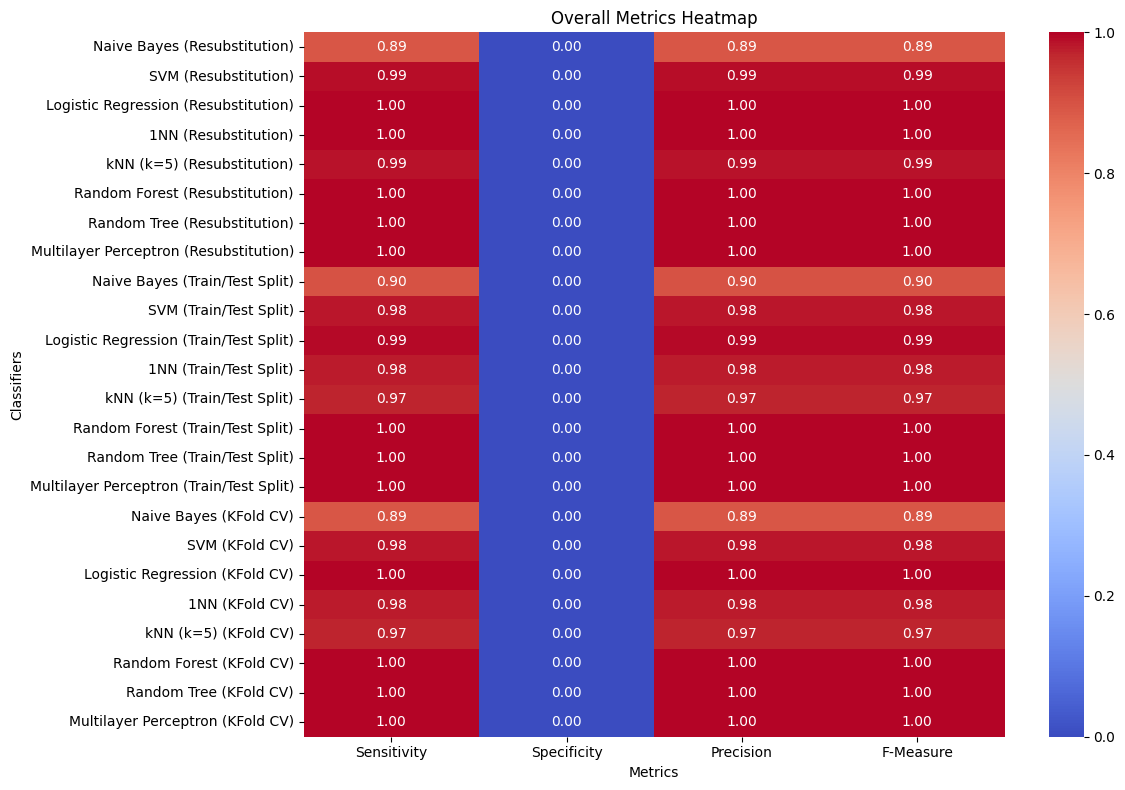

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(overall_metrics_df.drop(columns=["AUC"]), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Overall Metrics Heatmap")
plt.ylabel("Classifiers")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()